# Import packages
run the following cell to import necessary packages to run the analysis

In [1]:
import os
from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
from matplotlib import pyplot as plt
# from pylibCZIrw import czi as pyczi
# from bioio import BioImage
# import bioio_czi

# Reading data

In [64]:
data_path = Path('/mnt/Data/nuno_martins/Image_data/Ex011_Re01/ExM/20250423/Airyscan_processed/')
filelist = os.listdir(data_path)
print(len(filelist))

2


In [65]:
filelist = [x for x in filelist if x.find('.czi')>0]
filelist.sort()

In [66]:
filelist

['NPM_Ex011_Re01_a2_postExM_Im-01_AcquisitionBlock1-Airyscan Processing-11_2.czi',
 'NPM_Ex011_Re01_a2_postExM_Im-01_AcquisitionBlock2-Airyscan Processing-12_2.czi']

In [ ]:
file_index = 0
file_path = str(data_path)+'/'+filelist[file_index]
filename = filelist[file_index][:filelist[file_index].index('.czi')]
print(file_path)
print(filename)

In [ ]:
save_path = Path(str(data_path)+'/split_czi')
save_path.mkdir(parents=True, exist_ok=True)
print(save_path)

In [16]:
def getDimensionPosition(dimension_order, dimension_name):
    return dimension_order.index(dimension_name)

___
with Zeiss library `pylibczirw`


In [6]:
from pylibCZIrw import czi as pyczi

In [6]:
with pyczi.open_czi(file_path) as czidoc:
    md_xml = czidoc.raw_metadata

# with open('./xml_metadata_airyscan.xml', 'w') as output:
#     output.write(md_xml)

In [7]:
with pyczi.open_czi(file_path) as czidoc:
    md_dic = czidoc.metadata
    # print(md_xml[:1000])
    dims_all = czidoc.scenes_bounding_rectangle_no_pyramid
    print(dims_all)
    bd = czidoc.scenes_bounding_rectangle
    print(bd)
    tbd = czidoc.total_bounding_box
    print(tbd)
    pixel_types = czidoc.pixel_types
    print(pixel_types)

{0: Rectangle(x=0, y=0, w=4084, h=4084)}
{0: Rectangle(x=0, y=0, w=4084, h=4084)}
{'T': (0, 1), 'Z': (0, 424), 'C': (0, 3), 'X': (0, 4084), 'Y': (0, 4084)}
{0: 'Gray16', 1: 'Gray16', 2: 'Gray16'}


In [19]:
file_metadata = md_dic

image_name = file_metadata['ImageDocument']['Metadata']['Experiment']['AutoSave']['Name']
original_display_metadata = file_metadata['ImageDocument']['Metadata']['DisplaySetting']['Channels']['Channel'][:2]

pixelsize_x = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][0]['Value'])
pixelsize_y = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][1]['Value'])
pixelsize_z = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][2]['Value'])

print(pixelsize_x, pixelsize_y, pixelsize_z)

1.0358032226562499e-07 1.0358032226562499e-07 4e-07


get z voxel size of all files in folder

In [67]:
images_to_inspect = []

for file in filelist:
    print(file)
    file_path = str(data_path)+'/'+file
    with pyczi.open_czi(file_path) as czidoc:
        md_dic = czidoc.metadata
        # print(md_xml[:1000])
        dims_all = czidoc.scenes_bounding_rectangle_no_pyramid
        print(dims_all)
        bd = czidoc.scenes_bounding_rectangle
        print(bd)
        tbd = czidoc.total_bounding_box
        print(tbd)
        pixel_types = czidoc.pixel_types
        print(pixel_types)

        pixelsize_x = float(md_dic['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][0]['Value'])
        pixelsize_y = float(md_dic['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][1]['Value'])
        pixelsize_z = float(md_dic['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][2]['Value'])

        print(pixelsize_x, pixelsize_y, pixelsize_z)

        z = tbd['Z'][1] // 2

        images_temp = []
        for chan in range(tbd['C'][1]):
            img = czidoc.read(
                plane={"C": chan, "T": 0, "Z": z},
                # scene=0,
            )
            images_temp.append(img)

        images_to_inspect.append(images_temp)
        print("_________________")

NPM_Ex011_Re01_a2_postExM_Im-01_AcquisitionBlock1-Airyscan Processing-11_2.czi
{0: Rectangle(x=0, y=0, w=7770, h=7770)}
{0: Rectangle(x=0, y=0, w=7770, h=7770)}
{'T': (0, 1), 'Z': (0, 698), 'C': (0, 3), 'X': (0, 7770), 'Y': (0, 7770)}
{0: 'Gray16', 1: 'Gray16', 2: 'Gray16'}
4.7081964666193245e-08 4.7081964666193245e-08 4e-07
_________________
NPM_Ex011_Re01_a2_postExM_Im-01_AcquisitionBlock2-Airyscan Processing-12_2.czi
{0: Rectangle(x=0, y=0, w=7771, h=7770)}
{0: Rectangle(x=0, y=0, w=7771, h=7770)}
{'T': (0, 1), 'Z': (0, 608), 'C': (0, 3), 'X': (0, 7771), 'Y': (0, 7770)}
{0: 'Gray16', 1: 'Gray16', 2: 'Gray16'}
4.7081964666193245e-08 4.7081964666193245e-08 4e-07
_________________


In [68]:
print(len(images_to_inspect))
print(len(images_to_inspect[0]))

2
3


In [ ]:
z = tbd['Z'][1] // 2
# print(z)

images = []
with pyczi.open_czi(str(data_path)+'/'+filelist[file_index]) as cziimg:
    for chan in range(tbd['C'][1]):
        img = cziimg.read(
            plane={"C": chan, "T": 0, "Z": z},
            # scene=0,
        )
        images.append(img)

# img.shape
print(len(images))
print(images[0].shape)

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(
    img,
    cmap='magma',
    vmin=np.percentile(img, 1),
    vmax=np.percentile(img, 95),
)

In [ ]:
index = 0
fig = plt.figure(figsize=(8, 8))
plt.imshow(
    images[index],
    cmap='magma',
    vmin=np.percentile(images[index], 1),
    vmax=np.percentile(images[index], 99),
)

In [ ]:
index = 6
fig = plt.figure(figsize=(8, 8))
plt.imshow(
    images[index][3500:6000, 2000:4500],
    cmap='magma',
    vmin=np.percentile(images[index][3500:6000, 2000:4500], 1),
    vmax=np.percentile(images[index][3500:6000, 2000:4500], 95),
)

In [ ]:
# index = 0
fig = plt.figure(figsize=(24, 8))
fig.add_subplot(1,3,1)
plt.imshow(
    images[0],
    cmap='magma',
    vmin=np.percentile(images[0], 1),
    vmax=np.percentile(images[0], 99),
)
fig.add_subplot(1,3,2)
plt.imshow(
    images[1],
    cmap='magma',
    vmin=np.percentile(images[1], 1),
    vmax=np.percentile(images[1], 95),
)
fig.add_subplot(1,3,3)
plt.imshow(
    images[2],
    cmap='magma',
    vmin=np.percentile(images[2], 1),
    vmax=np.percentile(images[2], 95),
)

In [23]:
from tifffile import imwrite

In [26]:
images_saving = np.asarray(images)
imwrite(str(save_path)+'npm_ex010_re02_gel_b6_block5_test.tiff', images_saving)

___

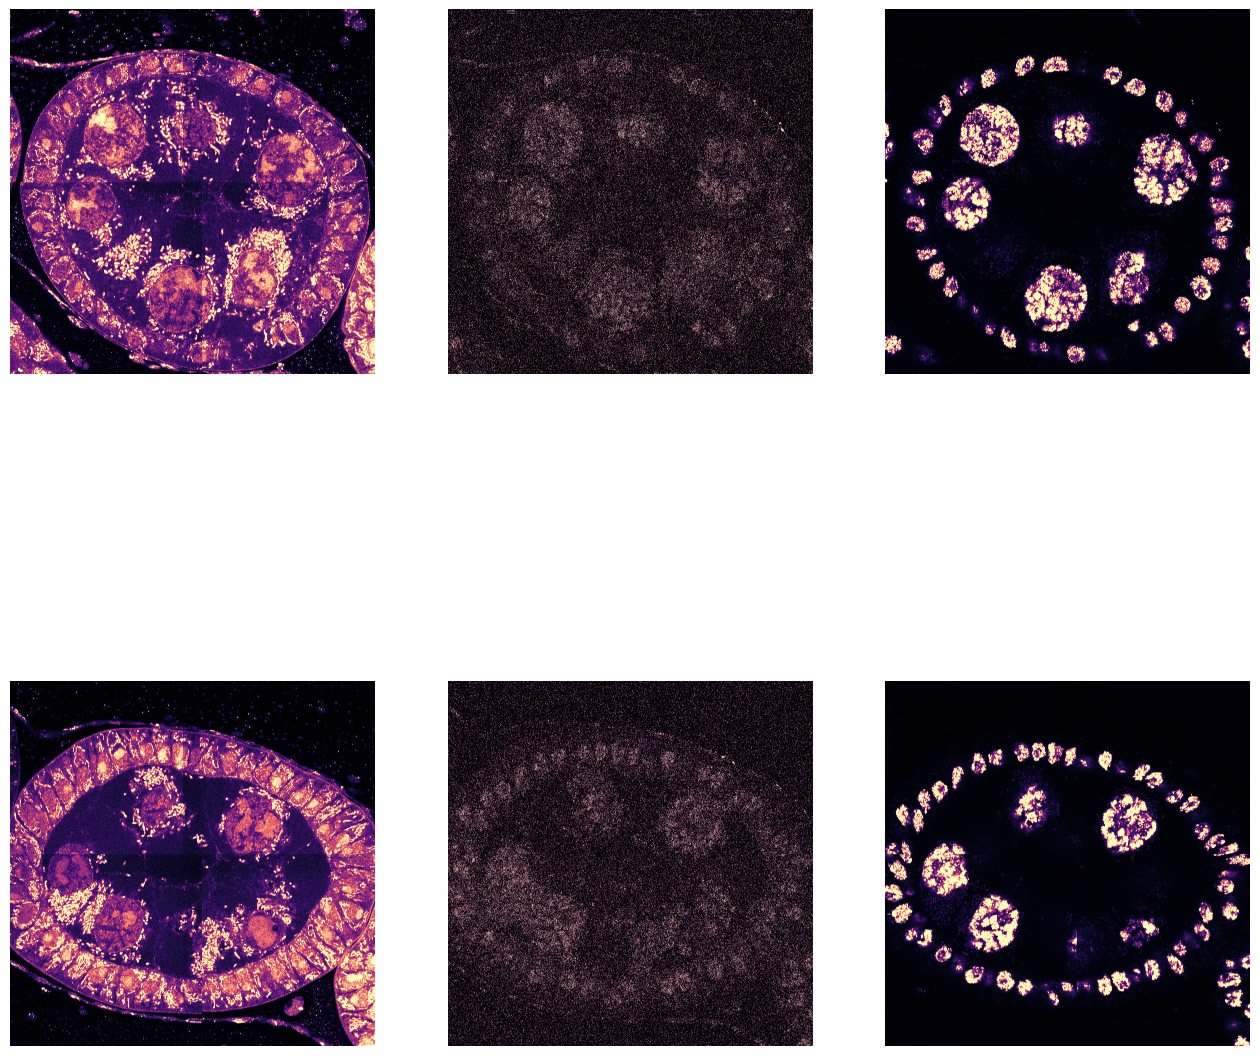

In [69]:
x, y = len(images_to_inspect[0]), len(images_to_inspect)
index = 0

fig = plt.figure(figsize=(16,16))
for i in range(y):
    for j in range(x):
        plt.subplot(y, x, i * x + j + 1)
        # img = temp_image[index]
        img = images_to_inspect[i][j]
        # if pmin!=0 or pmax!=100:
        #     img = normalize(img,pmin=pmin,pmax=pmax,clip=True)
        plt.imshow(
            img,
            vmin=np.percentile(img, 1),
            vmax=np.percentile(img, 95),
            cmap='magma',
            )
        plt.axis("off")
        index+=1